In [2]:
# import
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import sklearn.metrics as sm
from sklearn.metrics import r2_score

Solving environment: ...working... unsuccessful initial attempt using frozen solve. Retrying with flexible solve.
Solving environment: ...working... unsuccessful initial attempt using frozen solve. Retrying with flexible solve.


DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:https://repo.anaconda.com:443 "GET /pkgs/msys2/noarch/current_repodata.json HTTP/1.1" 304 0
DEBUG:urllib3.connectionpool:https://repo.anaconda.com:443 "GET /pkgs/msys2/win-64/current_repodata.json HTTP/1.1" 304 0
DEBUG:urllib3.connectionpool:https://repo.anaconda.com:443 "GET /pkgs/main/win-64/current_repodata.json HTTP/1.1" 200 None
DEBUG:urllib3.connectionpool:https://repo.anaconda.com:443 "GET /pkgs/r/win-64/current_repodata.json HTTP/1.1" 304 0
DE

In [46]:

#cleaning didnt really make sense, apart from only filtering which columns is used
#deploy og print via st til streamlit. Kig i min deploy test. I terminal fra anaconda streamlit run filnavn og husk outcomment i fil.
# read CSV file from the 'data' subdirectory using a relative path
data = pd.read_csv('../excercises/Data/house-data.csv', index_col=0)
#line below, write the parameters that is not wanted
#datafiltered=data.loc[:, ~data.columns.isin(['date', 'sqft_lot','condition', 'floors','waterfront','sqft_above','sqft_basement','yr_built','lat','long','sqft_living15','sqft_lot15'])]

datafiltered=data.loc[:, ~data.columns.isin(['date', 'sqft_lot','condition', 'floors','sqft_above','sqft_basement','yr_built','lat','long','sqft_living15','sqft_lot15'])]
datafiltered

,price,bedrooms,bathrooms,sqft_living,waterfront,view,grade,yr_renovated,zipcode
id,,,,,,,,,
7129300520,221900.0,3,1.00,1180,0,0,7,0,98178
6414100192,538000.0,3,2.25,2570,0,0,7,1991,98125
5631500400,180000.0,2,1.00,770,0,0,6,0,98028
2487200875,604000.0,4,3.00,1960,0,0,7,0,98136
1954400510,510000.0,3,2.00,1680,0,0,8,0,98074
...,...,...,...,...,...,...,...,...,...
263000018,360000.0,3,2.50,1530,0,0,8,0,98103
6600060120,400000.0,4,2.50,2310,0,0,8,0,98146
1523300141,402101.0,2,0.75,1020,0,0,7,0,98144


In [4]:
datafiltered.isnull().sum()

price           0
bedrooms        0
bathrooms       0
sqft_living     0
view            0
grade           0
yr_renovated    0
zipcode         0
dtype: int64

In [5]:
# check the shape of the DataFrame (rows, columns)
datafiltered.shape

(21613, 8)

In [6]:
# display the first 5 rows
datafiltered.head()

,price,bedrooms,bathrooms,sqft_living,view,grade,yr_renovated,zipcode
id,,,,,,,,
7129300520,221900.0,3,1.00,1180,0,7,0,98178
6414100192,538000.0,3,2.25,2570,0,7,1991,98125
5631500400,180000.0,2,1.00,770,0,6,0,98028
2487200875,604000.0,4,3.00,1960,0,7,0,98136
1954400510,510000.0,3,2.00,1680,0,8,0,98074


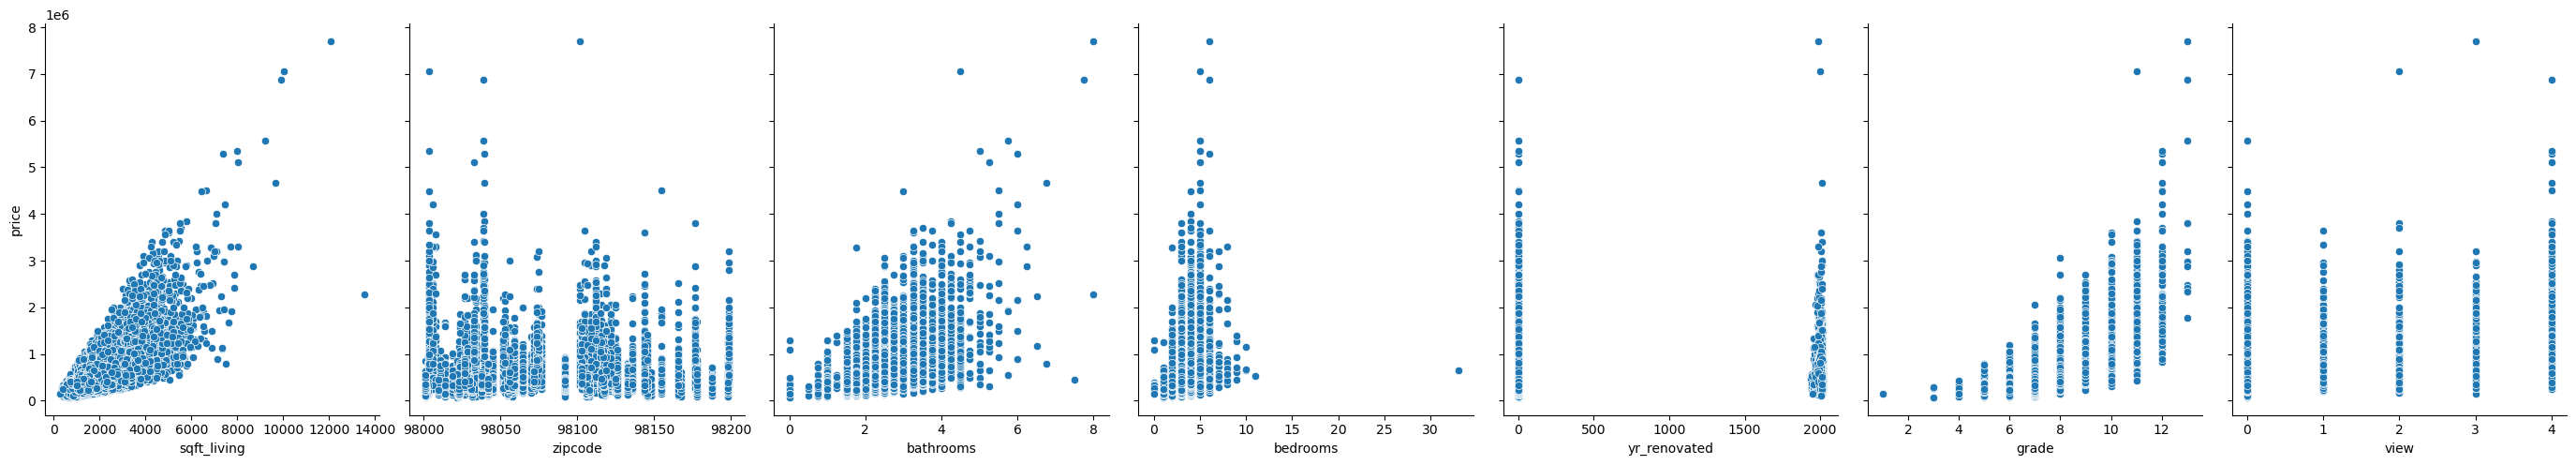

In [7]:
sns.pairplot(datafiltered, x_vars=['sqft_living','zipcode','bathrooms', 'bedrooms','yr_renovated','grade','view'], y_vars='price', height=5, aspect=0.8)


In [8]:
# create a Python list of feature names
feature_cols = ['sqft_living','zipcode','bathrooms', 'bedrooms','yr_renovated','grade','view']
# use the list to select a subset of the original DataFrame
X = datafiltered[feature_cols]
# print the first 5 rows
X.head()



,sqft_living,zipcode,bathrooms,bedrooms,yr_renovated,grade,view
id,,,,,,,
7129300520,1180,98178,1.00,3,0,7,0
6414100192,2570,98125,2.25,3,1991,7,0
5631500400,770,98028,1.00,2,0,6,0
2487200875,1960,98136,3.00,4,0,7,0
1954400510,1680,98074,2.00,3,0,8,0


In [9]:
print(type(X))
print(X.shape)

<class 'pandas.core.frame.DataFrame'>
(21613, 7)


In [10]:
# select a Series from the DataFrame for y
y = datafiltered['price']

# equivalent command that works if there are no spaces in the column name
y = datafiltered.price

# print the first 5 values
y.head()

id
7129300520    221900.0
6414100192    538000.0
5631500400    180000.0
2487200875    604000.0
1954400510    510000.0
Name: price, dtype: float64

In [11]:
# check the type and shape of y
print(type(y))
print(y.shape)

<class 'pandas.core.series.Series'>
(21613,)


In [12]:
#Splitting into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [13]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(16209, 7)
(16209,)
(5404, 7)
(5404,)


In [14]:
# create a model
linreg = LinearRegression()

# fit the model to our training data
linreg.fit(X_train, y_train)

LinearRegression()

In [15]:
# the intercept and coefficients are stored in system variables
print('b0 =', linreg.intercept_)
print('bi =', linreg.coef_)

b0 = -45149736.8782282
bi = [ 1.94604158e+02  4.55351095e+02 -2.20398003e+04 -2.63935239e+04
  7.23916381e+01  9.57914453e+04  8.11762101e+04]


In [16]:
# pair the feature names with the coefficients
list(zip(feature_cols, linreg.coef_))

[('sqft_living', 194.60415818438454),
 ('zipcode', 455.3510945608199),
 ('bathrooms', -22039.800325393902),
 ('bedrooms', -26393.52387976681),
 ('yr_renovated', 72.39163812548128),
 ('grade', 95791.44529759353),
 ('view', 81176.21005969345)]

In [17]:
y_test

id
1310430130     459000.0
2540830020     445000.0
8835770330    1057000.0
7732400490     732350.0
2800031        235000.0
                ...    
5423040140     680000.0
7452500770     267500.0
7202430110     725000.0
2220069196     253500.0
2026049183     324950.0
Name: price, Length: 5404, dtype: float64

In [18]:
y_predicted = linreg.predict(X_test)
y_predicted

array([739965.81481555, 338654.02332458, 924232.19291028, ...,
       734108.43373612, 195633.4856183 , 451437.20425216])

In [19]:
from sklearn import metrics

In [20]:
print(metrics.mean_absolute_error(y_test, y_predicted))

154272.5805552612


In [21]:
# calculate MSE using scikit-learn
print(metrics.mean_squared_error(y_test, y_predicted))

65855712887.84936


In [22]:
# calculate RMSE using scikit-learn
print(np.sqrt(metrics.mean_squared_error(y_test, y_predicted)))

256623.67951506222


In [23]:
eV = round(sm.explained_variance_score(y_test, y_predicted), 2)
print('Explained variance score ',eV )

Explained variance score  0.59


In [24]:
r2_score(y_test, y_predicted)

0.588713842439351

In [25]:
# create a Python list of feature names
#feature_cols = ['sqft_lot','zipcode','bathrooms', 'bedrooms','yr_renovated','condition','grade','view']
feature_cols = ['sqft_living','sqft_basement','zipcode','bathrooms', 'bedrooms','yr_renovated','grade','view','condition']


# use the list to select a subset of the original DataFrame
X = data[feature_cols]

# select a Series from the DataFrame
y = data.price

# split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

# make predictions on the testing set
y_predicted = linreg.predict(X_test)

# compute the RMSE of our predictions
print(np.sqrt(metrics.mean_squared_error(y_test, y_predicted)))

253311.34127262863


In [26]:
r2_score(y_test, y_predicted)

0.59926257192611

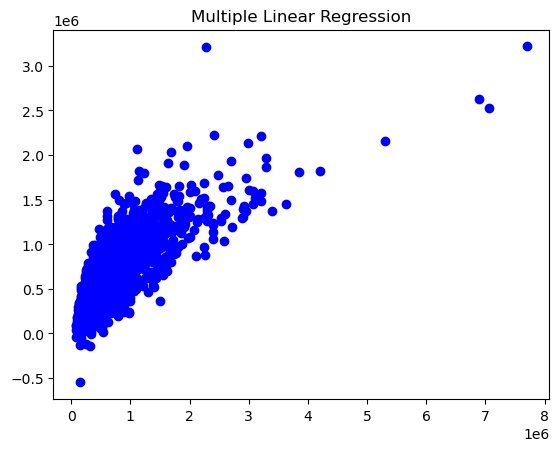

In [43]:
plt.title('Multiple Linear Regression')
plt.scatter(y_test, y_predicted, color='blue')

plt.show()

In [28]:
corr_matrix = data.corr()


C:\Users\Johan\AppData\Local\Temp\ipykernel_23044\392553564.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


In [47]:
#corr_matrix2=heatmapdf.corr()
corr_matrix2=datafiltered.corr()

<Axes: >

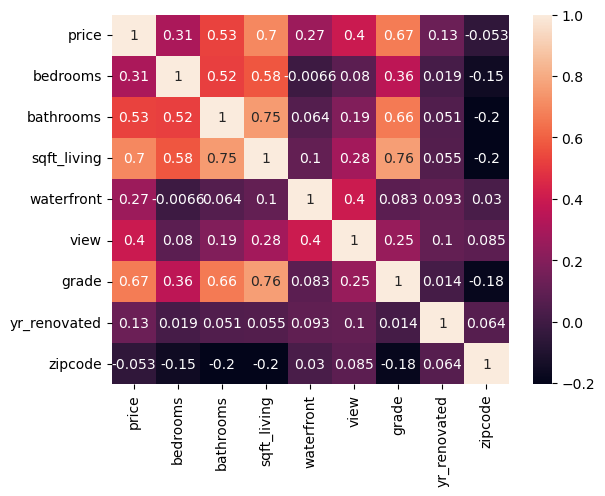

In [48]:
sns.heatmap(corr_matrix2, annot=True)

In [31]:
#Making DFs from datafiltered to be able to make regression and potentially discover interesting data

In [32]:

df_sqft_living=datafiltered[['price','sqft_living']].copy()
df_sqft_living.head()

,price,sqft_living
id,,
7129300520,221900.0,1180
6414100192,538000.0,2570
5631500400,180000.0,770
2487200875,604000.0,1960
1954400510,510000.0,1680


In [33]:
df_zip=datafiltered[['price','zipcode']].copy()
df_zip.head()

,price,zipcode
id,,
7129300520,221900.0,98178
6414100192,538000.0,98125
5631500400,180000.0,98028
2487200875,604000.0,98136
1954400510,510000.0,98074


In [51]:
df_bath=datafiltered[['price','bathrooms']].copy()
df_bath.head()

,price,bathrooms
id,,
7129300520,221900.0,1.00
6414100192,538000.0,2.25
5631500400,180000.0,1.00
2487200875,604000.0,3.00
1954400510,510000.0,2.00


In [53]:
df_bedrooms=datafiltered[['price','bedrooms']].copy()
df_bedrooms.head()

,price,bedrooms
id,,
7129300520,221900.0,3
6414100192,538000.0,3
5631500400,180000.0,2
2487200875,604000.0,4
1954400510,510000.0,3


In [54]:
df_renovated=datafiltered[['price','yr_renovated']].copy()
df_renovated.head()

,price,yr_renovated
id,,
7129300520,221900.0,0
6414100192,538000.0,1991
5631500400,180000.0,0
2487200875,604000.0,0
1954400510,510000.0,0


In [55]:
df_grade=datafiltered[['price','grade']].copy()
df_grade.head()

,price,grade
id,,
7129300520,221900.0,7
6414100192,538000.0,7
5631500400,180000.0,6
2487200875,604000.0,7
1954400510,510000.0,8


In [60]:
df_view=datafiltered[['price','view']].copy()
df_view.info()

#df_view.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21613 entries, 7129300520 to 1523300157
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   21613 non-null  float64
 1   view    21613 non-null  int64  
dtypes: float64(1), int64(1)
memory usage: 506.6 KB


In [75]:
#def plottingFunc(x):
#    Xfunc = datafiltered[x].values.reshape(-1, 1)
#    plt.ylabel('price')
#    plt.xlabel(x)
#    plt.scatter(Xfunc, y, color='blue')
#    plt.show()
#    return Xfunc

In [34]:
def trainingStation(X, Xname):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123, test_size=0.15)
    myreg = LinearRegression()
    myreg.fit(X_train, y_train)
    a = myreg.coef_
    b = myreg.intercept_
    y_predicted = myreg.predict(X_test)
    plt.title('Linear Regression')
    plt.scatter(X, y, color='green')
    plt.plot(X_train, a*X_train + b, color='blue')
    plt.plot(X_test, y_predicted, color='orange')
    plt.xlabel(Xname)
    plt.ylabel('price')
    plt.show()
    


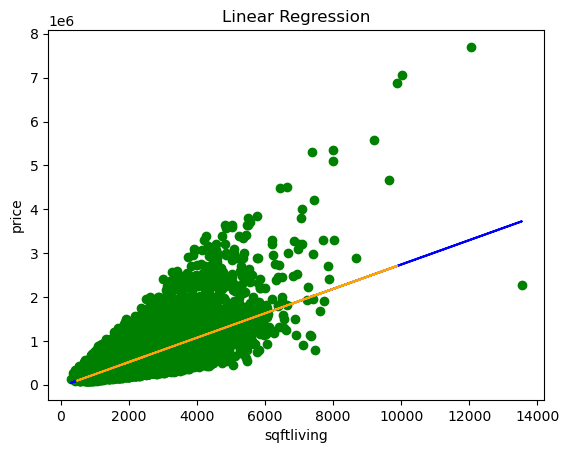

In [35]:
Xsqft_living = datafiltered['sqft_living'].values.reshape(-1, 1)
trainingStation(Xsqft_living, 'sqftliving')

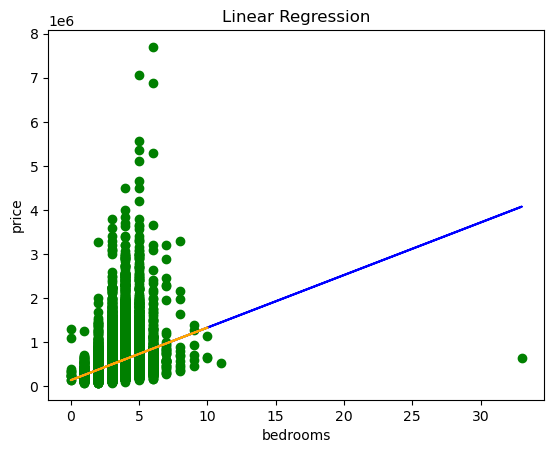

In [36]:
Xbedrooms = datafiltered['bedrooms'].values.reshape(-1, 1)
trainingStation(Xbedrooms, 'bedrooms')

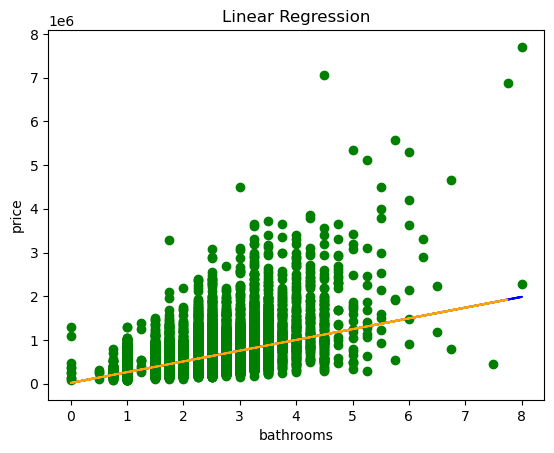

In [37]:
Xbathrooms = datafiltered['bathrooms'].values.reshape(-1, 1)
trainingStation(Xbathrooms, 'bathrooms')

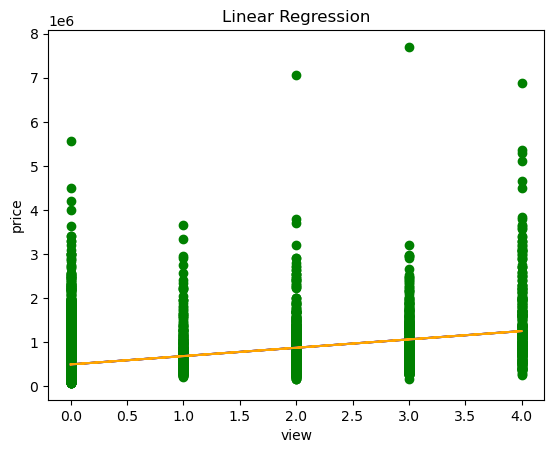

In [39]:
#Judging from the looks of it this does not give us much relevant data but a bar chart would probably make this much
#more readable
#This could already have been predicted from the scatter plot, but personal preference makes it even more apparent with regression

Xview = datafiltered['view'].values.reshape(-1, 1)
trainingStation(Xview, 'view')

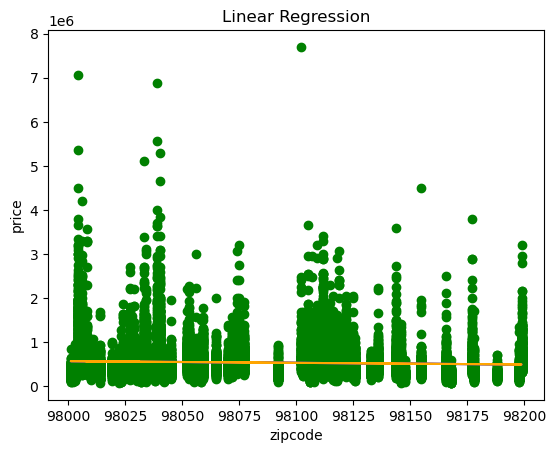

In [41]:
#As the zipcodes doesn't really have a numeric meaning, a bar chart might give us might information regarding this data.
#This could already have been predicted from the scatter plot, but personal preference makes it even more apparent with regression
Xzip = datafiltered['zipcode'].values.reshape(-1, 1)
trainingStation(Xzip, 'zipcode')

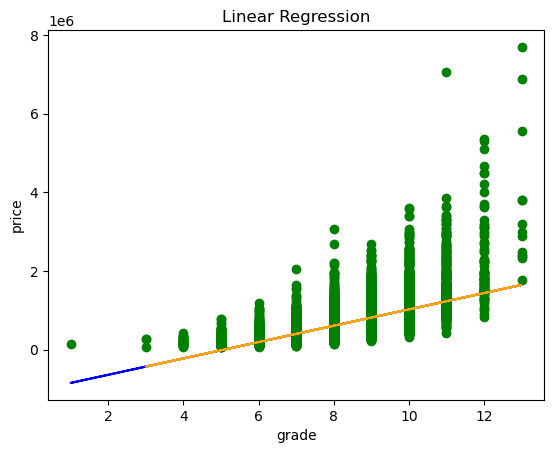

In [38]:
Xgrade = datafiltered['grade'].values.reshape(-1, 1)
trainingStation(Xgrade, 'grade')

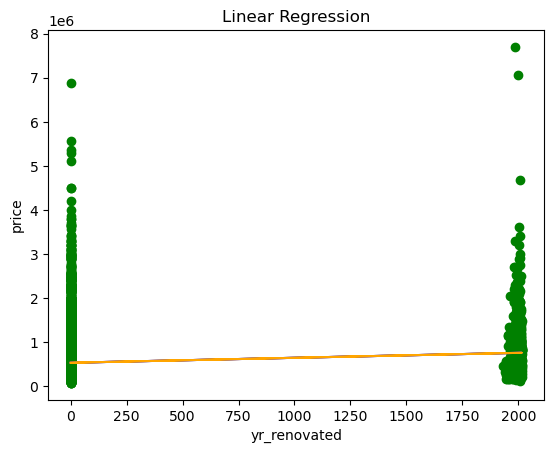

In [44]:
#This one is always going to look really odd. 
#I find that some research on buildings would have to be made to give the 0 values a reasonable average.
Xrenovated = datafiltered['yr_renovated'].values.reshape(-1, 1)
trainingStation(Xrenovated, 'yr_renovated')

In [45]:
from scipy import stats as st
st.trim_mean(datafiltered.grade, 0.1)

7.583887571569024

In [58]:
def viz_polymonial(X,y_pre,name):
    plt.scatter(X, y, color='red')
    plt.plot(X, y_pre , color='blue')
    plt.title('Polynomia Regression)')
    plt.xlabel(name)
    plt.ylabel('price')
    plt.show()
    return

In [51]:
def polyFitter(X):
    poly_model = PolynomialFeatures(degree=5)
    X_poly = poly_model.fit_transform(X)
    pol_reg = LinearRegression()
    pol_reg.fit(X_poly, y)
    return pol_reg


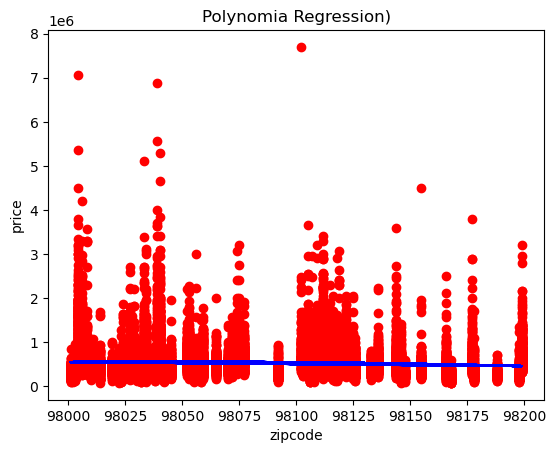

In [59]:
poly_model=PolynomialFeatures(degree=5)
zippolreg=polyFitter(Xzip)
X_poly_zip = poly_model.fit_transform(Xzip)
y_predict = zippolreg.predict(X_poly_zip)
viz_polymonial(Xzip, y_predict, 'zipcode')


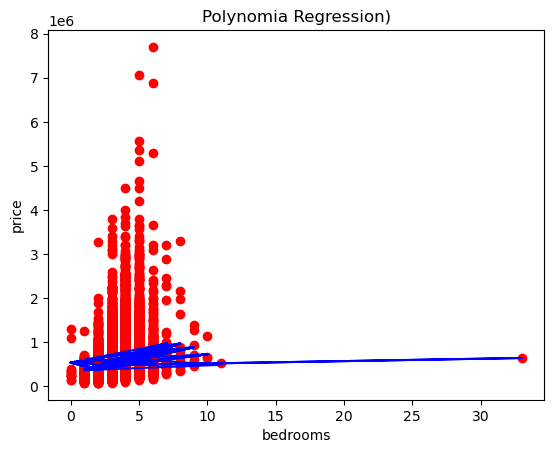

In [61]:
poly_model=PolynomialFeatures(degree=5)
bedpolreg=polyFitter(Xbedrooms)
X_poly_bed = poly_model.fit_transform(Xbedrooms)
y_predict = bedpolreg.predict(X_poly_bed)
viz_polymonial(Xbedrooms, y_predict, 'bedrooms')

In [ ]:
#TODO MAKE SMOOTH OUT POLY
# Additional feature
# Making the plot line more smooth
def viz_polymonial_smooth():
    X_grid = np.arange(min(X), max(X), 0.1)
    X_grid = X_grid.reshape(len(X_grid), 1) #Why do we need to reshape? (https://www.tutorialspoint.com/numpy/numpy_reshape.htm)
    # Visualizing the Polymonial Regression results
    plt.scatter(X, y, color='red')
    plt.plot(X_grid, pol_reg.predict(poly_model.fit_transform(X_grid)), color='blue')
    plt.title('Polynomial Regression')
    plt.xlabel('sqft_living')
    plt.ylabel('price')
    plt.show()
    return